In [40]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import acquire
import prepare
import analysis
import model_func as m

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [6]:
# read titanic data
df = pd.read_csv('titanic_df.csv')

df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [8]:
# prepare the data
train, validate, test = prepare.prep_titanic(df)

In [9]:
drops = ['sex', 'class','embarked', 'embark_town', 'passenger_id']


In [10]:
[dataset.drop(columns=drops, inplace=True) for dataset in [train, validate, test]]

[None, None, None]

In [11]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [14]:
train.head()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,alone,Q,S
583,583,0,1,36.000000,0,0,40.1250,1,0,0
337,337,1,1,41.000000,0,0,134.5000,1,0,0
50,50,0,3,7.000000,4,1,39.6875,0,0,1
218,218,1,1,32.000000,0,0,76.2917,1,0,0
31,31,1,1,29.916875,1,0,146.5208,0,0,0


In [15]:
# getting ready to test our models...
X_cols = ['pclass', 'age', 'alone', 'Q', 'S']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [16]:
# 1. Create the object
baseline = DummyClassifier(strategy='constant', constant=0)
# 2. Fit the object
baseline.fit(X_train, y_train)
# how does it do on training data set?
print('Baseline accuracy: %.4f' % baseline.score(X_train, y_train))

Baseline accuracy: 0.6177


2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [17]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
train['model1_pred'] = model1.predict(X_train)

In [19]:
train

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,alone,Q,S,model1_pred
583,583,0,1,36.000000,0,0,40.1250,1,0,0,0
337,337,1,1,41.000000,0,0,134.5000,1,0,0,1
50,50,0,3,7.000000,4,1,39.6875,0,0,1,0
218,218,1,1,32.000000,0,0,76.2917,1,0,0,1
31,31,1,1,29.916875,1,0,146.5208,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
313,313,0,3,28.000000,0,0,7.8958,1,0,1,0
636,636,0,3,32.000000,0,0,7.9250,1,0,1,1
222,222,0,3,51.000000,0,0,8.0500,1,0,1,0
485,485,0,3,29.916875,3,1,25.4667,0,0,1,0


In [20]:
print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 87.53%
validate score: 68.22%


[Text(806.1422468354431, 633.1341176470589, 'pclass <= 2.5\ngini = 0.472\nsamples = 497\nvalue = [307, 190]\nclass = died'),
 Text(425.51914556962026, 594.7623529411765, 'alone <= 0.5\ngini = 0.493\nsamples = 231\nvalue = [102, 129]\nclass = survived'),
 Text(115.21993670886077, 556.3905882352942, 'age <= 17.5\ngini = 0.42\nsamples = 110\nvalue = [33, 77]\nclass = survived'),
 Text(25.427848101265823, 518.0188235294117, 'age <= 3.0\ngini = 0.095\nsamples = 20\nvalue = [1, 19]\nclass = survived'),
 Text(16.951898734177217, 479.64705882352945, 'pclass <= 1.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = survived'),
 Text(8.475949367088608, 441.2752941176471, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = died'),
 Text(25.427848101265823, 441.2752941176471, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = survived'),
 Text(33.90379746835443, 479.64705882352945, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = survived'),
 Text(205.01202531645572, 518.0188235294117, 'age <= 29

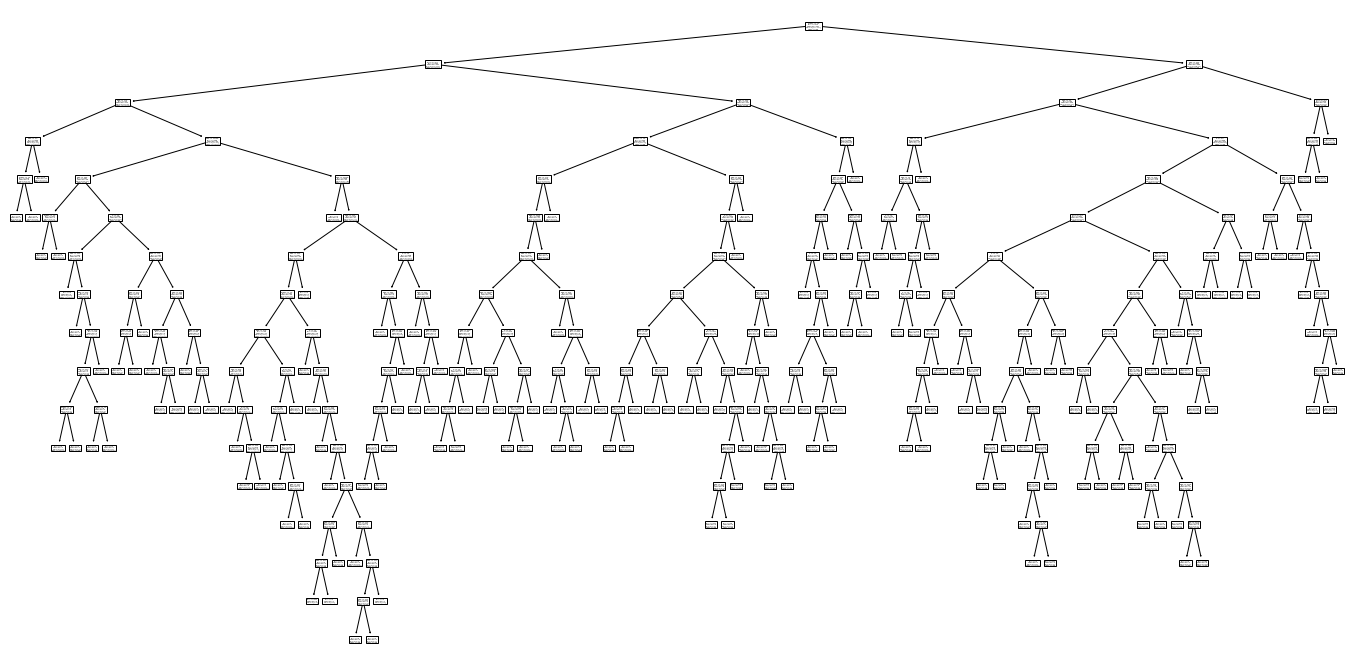

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))
plot_tree(
    model1,
    feature_names=X_train.columns.tolist(),
    class_names=['died', 'survived'],
)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [22]:
train['prediction'] = model1.predict(X_train)

In [23]:
train['prediction'].head()

583    0
337    1
50     0
218    1
31     1
Name: prediction, dtype: int64

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [24]:
pd.DataFrame(confusion_matrix(train.survived, train.prediction), index=['actual death', 'actual survived'])

,0,1
actual death,295,12
actual survived,50,140


In [25]:
rubric_df = pd.DataFrame([['True Negative', 'False positive'], ['False Negative', 'True Positive']], columns=['pred death', 'pred survived'])

In [87]:
rubric_df + ': ' + confusion_matrix(train.survived, train.prediction).astype(str)

,pred death,pred survived
0,True Negative: 295,False positive: 12
1,False Negative: 50,True Positive: 140


In [28]:
tp = 140
tn = 295
fp = 12
fn = 50
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(fn+tp)

In [29]:
classification = pd.DataFrame(classification_report(train.survived, train.prediction, output_dict=True))

In [30]:
classification

,0,1,accuracy,macro avg,weighted avg
precision,0.855072,0.921053,0.875252,0.888063,0.880296
recall,0.960912,0.736842,0.875252,0.848877,0.875252
f1-score,0.904908,0.818713,0.875252,0.861811,0.871956
support,307.000000,190.000000,0.875252,497.000000,497.000000


In [31]:
# accuracy
accuracy_1 = (train.survived == train.prediction).mean()
# Precision
subset = train[train.prediction == 1]
precision_t1 = (subset.prediction == subset.survived).mean()
# Recall
subset = train[train.survived == 1]
recall_t1 = (subset.prediction == subset.survived).mean()
# f1-score

print(f'The overall Accuracy is {accuracy_1:.2%}')
print(f'The True Positive rate is {tpr:.2%}')
print(f'The False Positive rate is {fpr:.2%}')
print(f'The True Negative rate is {tnr:.2%}')
print(f'The False Negative rate is {fnr:.2%}')
print(f'Precision for tree 1 is {precision_t1:.2%}')
print(f'Recall for tree 1 is {recall_t1:.2%}')

The overall Accuracy is 87.53%
The True Positive rate is 73.68%
The False Positive rate is 3.91%
The True Negative rate is 96.09%
The False Negative rate is 26.32%
Precision for tree 1 is 92.11%
Recall for tree 1 is 73.68%


5. Run through steps 2-4 using a different max_depth value.

In [32]:
model2 = DecisionTreeClassifier(max_depth = 2)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

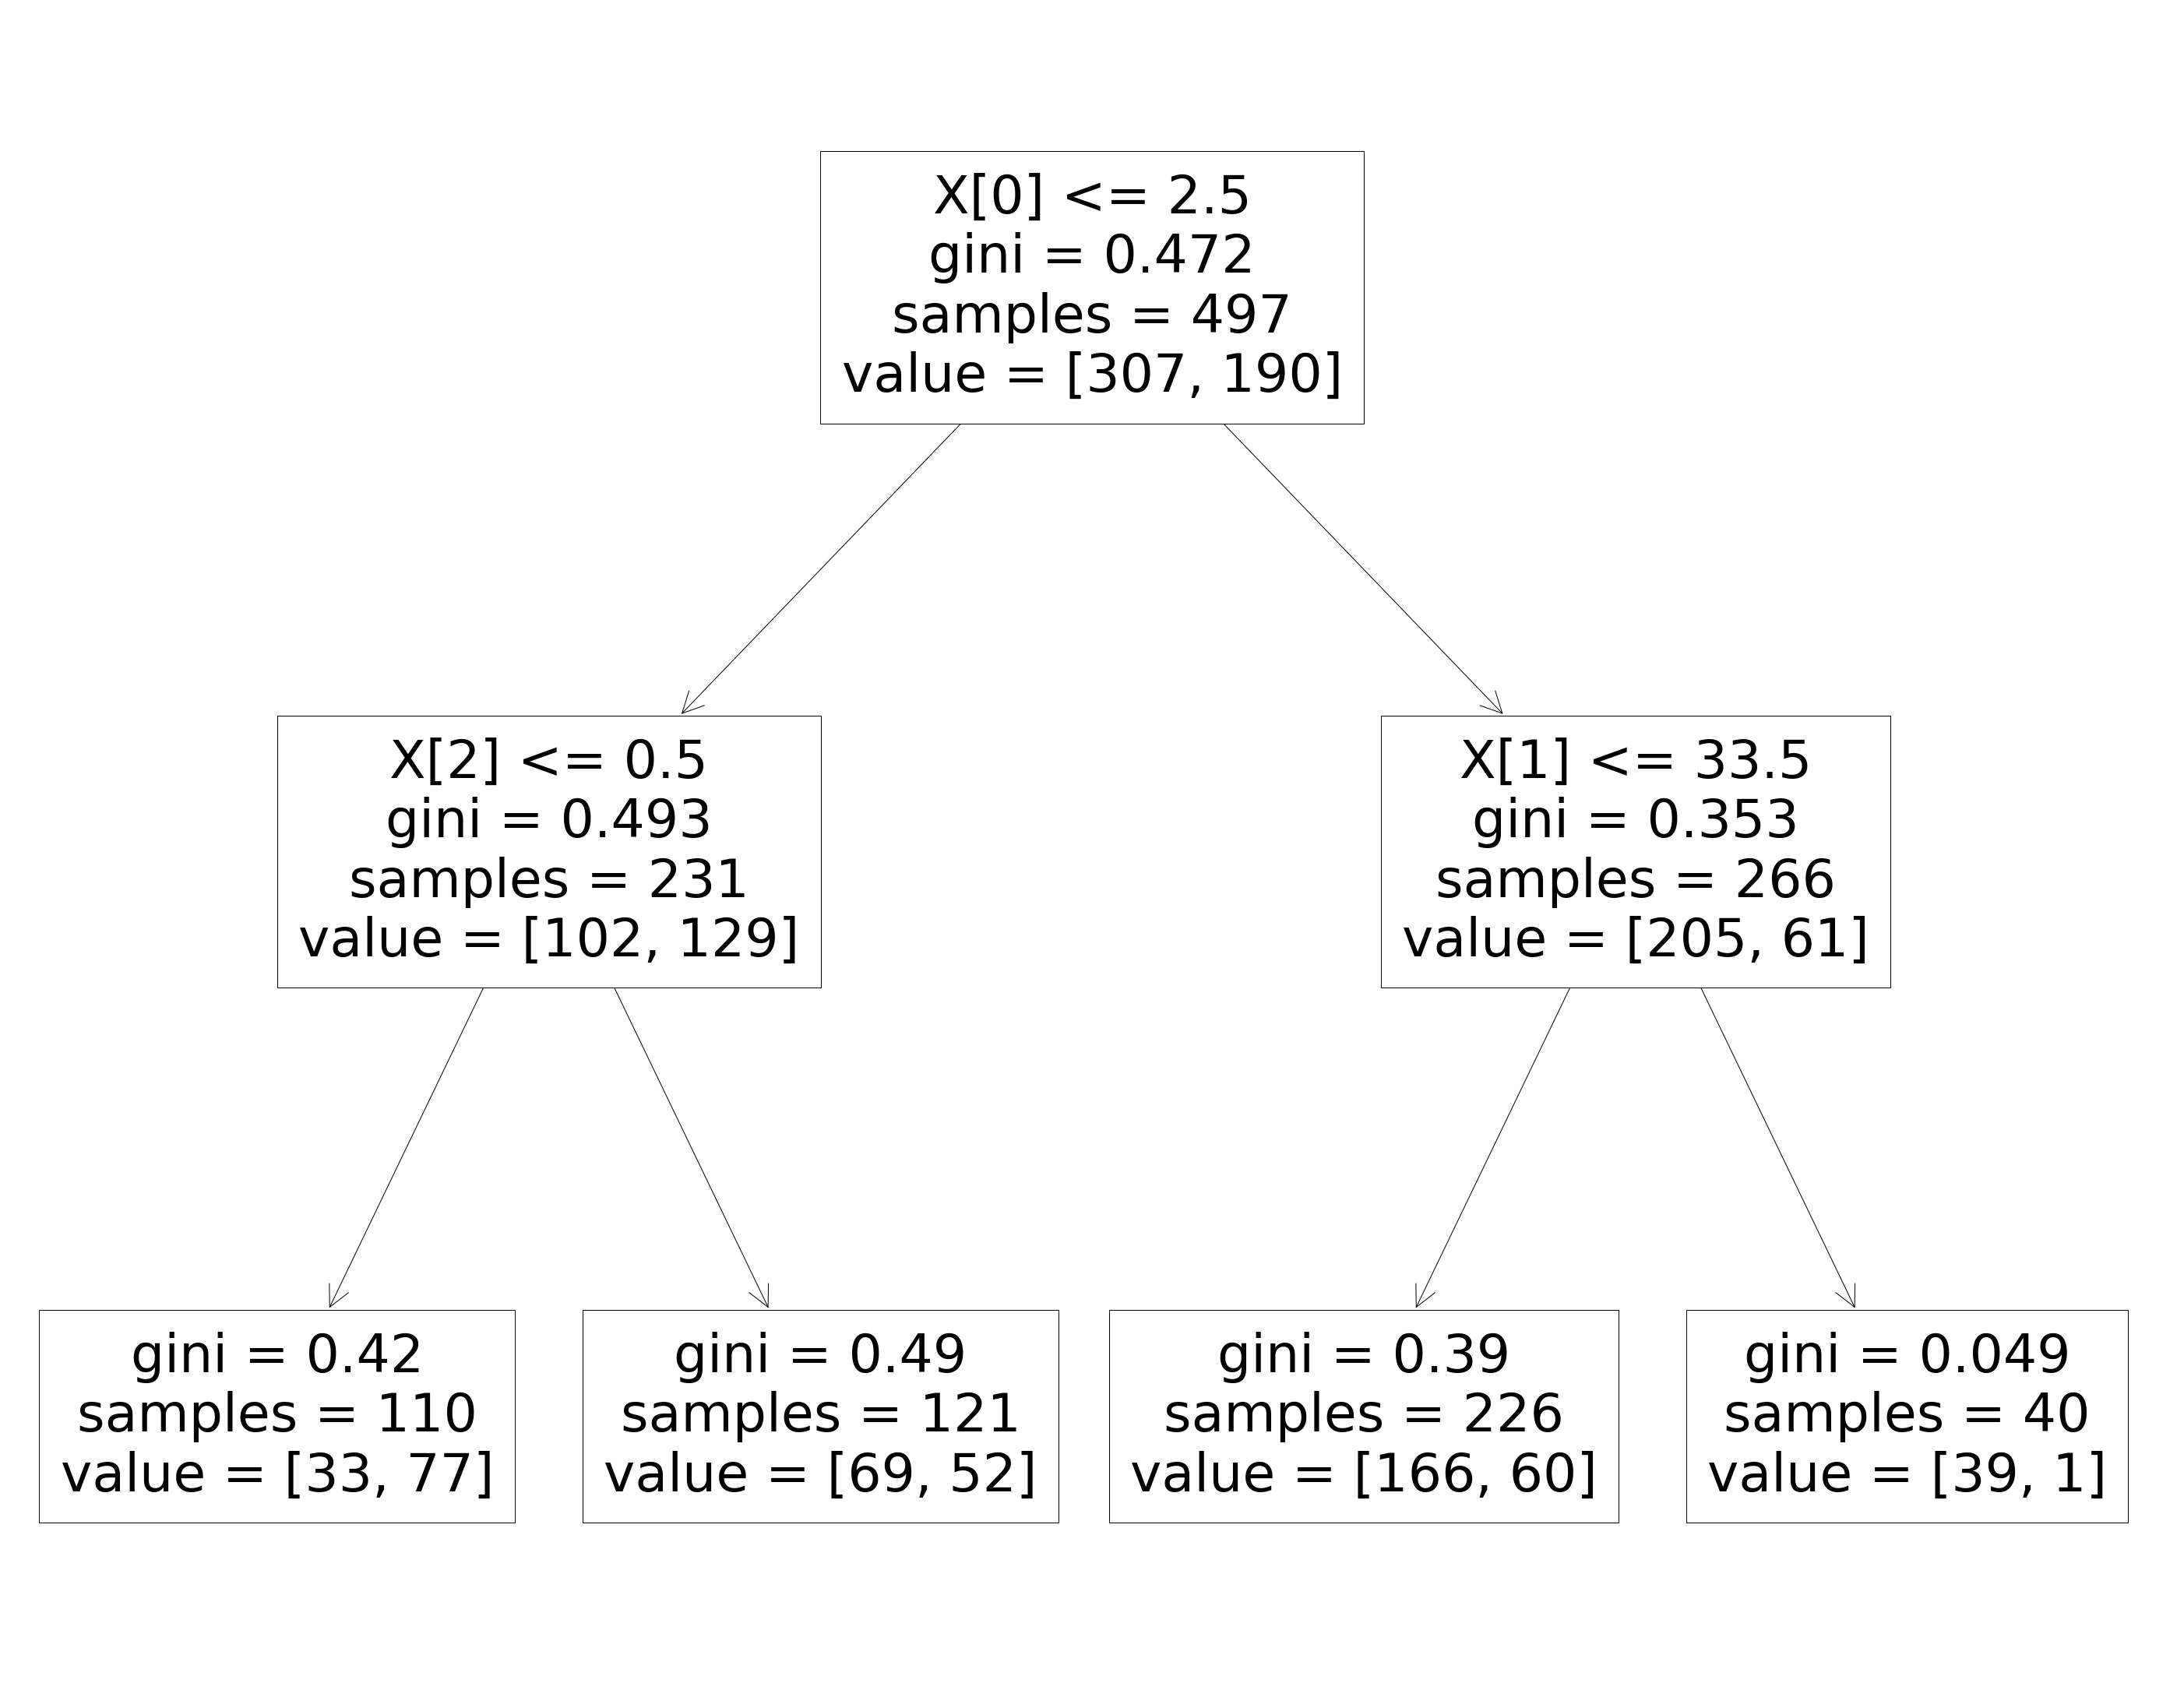

In [33]:
plt.figure(figsize = [50,40])
plt.show(plot_tree(model2))

In [34]:
train['model2_pred'] = model2.predict(X_train)
train.head()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,alone,Q,S,model1_pred,prediction,model2_pred
583,583,0,1,36.000000,0,0,40.1250,1,0,0,0,0,0
337,337,1,1,41.000000,0,0,134.5000,1,0,0,1,1,0
50,50,0,3,7.000000,4,1,39.6875,0,0,1,0,0,0
218,218,1,1,32.000000,0,0,76.2917,1,0,0,1,1,0
31,31,1,1,29.916875,1,0,146.5208,0,0,0,1,1,1


In [40]:
validate['model2_pred'] = model2.predict(X_validate)
validate.head()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,alone,Q,S,model2_pred
610,610,0,3,39.000000,1,5,31.2750,0,0,1,0
424,424,0,3,18.000000,1,1,20.2125,0,0,1,0
568,568,0,3,29.916875,0,0,7.2292,1,0,0,0
701,701,1,1,35.000000,0,0,26.2875,1,0,1,0
101,101,0,3,29.916875,0,0,7.8958,1,0,1,0


In [41]:
print(classification_report(train.survived, train.model2_pred))


              precision    recall  f1-score   support

           0       0.71      0.89      0.79       307
           1       0.70      0.41      0.51       190

    accuracy                           0.71       497
   macro avg       0.70      0.65      0.65       497
weighted avg       0.70      0.71      0.68       497



In [42]:
print(f'Train model is {model2.score(X_train, y_train):.2%}')
print(f'Validate model is {model2.score(X_validate, y_validate):.2%}')

Train model is 70.62%
Validate model is 69.16%


In [43]:

confusion_matrix(train.survived, train.model2_pred)

array([[274,  33],
       [113,  77]])

In [44]:
print(classification_report(validate.survived, validate.model2_pred))

              precision    recall  f1-score   support

           0       0.69      0.91      0.78       132
           1       0.70      0.34      0.46        82

    accuracy                           0.69       214
   macro avg       0.69      0.63      0.62       214
weighted avg       0.69      0.69      0.66       214



In [45]:
val_matrix2 = confusion_matrix(validate.survived, validate.model2_pred)
val_matrix2

array([[120,  12],
       [ 54,  28]])

In [46]:
print(f'Validate model accuracy is {model2.score(X_validate, y_validate):.2%}')

Validate model accuracy is 69.16%


In [47]:
tpr2 = val_matrix2[1,1] / (val_matrix2[1,1] + val_matrix2[1,0])
fpr2 = val_matrix2[0,1] / (val_matrix2[0,1] + val_matrix2[0,0])
tnr2 = val_matrix2[0,0] / (val_matrix2[0,0] + val_matrix2[0,1])
fnr2 = val_matrix2[1,0] / (val_matrix2[1,1] + val_matrix2[1,0])
print(f'True positive rate is {tpr2:.2%}')
print(f'False positive rate is {fpr2:.2%}')
print(f'True negative rate is {tnr2:.2%}')
print(f'False negative rate is {tnr2:.2%}')

True positive rate is 34.15%
False positive rate is 9.09%
True negative rate is 90.91%
False negative rate is 90.91%


6. Which model performs better on your in-sample data?

In [ ]:
t_matrix1 = confusion_matrix(train.survived, train.model1_pred)

In [ ]:
t_tpr = t_matrix1[1,1] / (t_matrix1[1,1] + t_matrix1[1,0])
t_fpr = t_matrix1[0,1] / (t_matrix1[0,1] + t_matrix1[0,0])
t_tnr = t_matrix1[0,0] / (t_matrix1[0,0] + t_matrix1[0,1])
t_fnr = t_matrix1[1,0] / (t_matrix1[1,1] + t_matrix1[1,0])

In [ ]:
t_matrix2 = confusion_matrix(train.survived, train.model2_pred)

In [ ]:
t_tpr2 = t_matrix2[1,1] / (t_matrix2[1,1] + t_matrix2[1,0])
t_fpr2 = t_matrix2[0,1] / (t_matrix2[0,1] + t_matrix2[0,0])
t_tnr2 = t_matrix2[0,0] / (t_matrix2[0,0] + t_matrix2[0,1])
t_fnr2 = t_matrix2[1,0] / (t_matrix2[1,1] + t_matrix2[1,0])

In [ ]:
print('Train model metrics:')
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-')
print(' ')
print(f'True positive rate for model1 is {t_tpr:.2%}')
print(f'False positive rate for model1 is  {t_fpr:.2%}')
print(f'True negative rate for model1 is {t_tnr:.2%}')
print(f'False negative rate for model 1 is {t_fnr:.2%}')
print('---------------------------')
print(f'True positive rate for model2 is {t_tpr2:.2%}')
print(f'False positive rate for model2 is {t_fpr2:.2%}')
print(f'True negative rate for model2 is {t_tnr2:.2%}')
print(f'False negative rate for model2 is {t_tnr2:.2%}')

Model 1 performs better on in sample data

7. Which model performs best on your out-of-sample data, the validate set?

In [ ]:
print('Model accuracies:')
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-')
print(' ')
print(f'Train model1 is {model1.score(X_train, y_train):.2%}')
print(f'Validate model1 is {model1.score(X_validate, y_validate):.2%}')
print('---------------------------')
print(f'Train model2 is {model2.score(X_train, y_train):.2%}')
print(f'Validate model2 is {model2.score(X_validate, y_validate):.2%}')

Model 2 performs better on out of sample data

In [61]:
def run_metrics(model, data_set):
    """
    This function takes in a model and ouputs metrics. 
    model = name of class model
    data_set = train, validate, test (AS A STRING)
    Will output the Precision Score, the classification report, and the confusion matrix
    It is advisable to print the name of the model you're working with before hand for clarity
    i.e. print('Metrics for Model 1 with Train data\n')
    """
    if data_set == 'train':
        X = X_train
        y = y_train
        df = train
    if data_set == 'validate':
        X = X_validate
        y = y_validate
        df = validate
    if data_set == 'test':
        X = X_test
        y = y_test
        df = test
    score = model.score(X, y)
    matrix = confusion_matrix(y, model.predict(X))
    tpr = matrix[1,1] / (matrix[1,1] + matrix[1,0])
    fpr = matrix[0,1] / (matrix[0,1] + matrix[0,0])
    tnr = matrix[0,0] / (matrix[0,0] + matrix[0,1])
    fnr = matrix[1,0] / (matrix[1,1] + matrix[1,0])
    prc = matrix[1,1] / (matrix[1,1] + matrix[0,1])
    
    print(f'{data_set} data set accuracy score: {score:.2%}')
    print(f'{data_set} data set precision score {prc:.2%}')
    print(f'{data_set} data set recall score: {tpr:.2%}')
    class_report = classification_report(y, model.predict(X), zero_division=True)
    print('-------------------------------')
    print(f'classification report')
    print(class_report)
    print ('-------------------------------')
    print('')
    print('confusion matrix')
    print(matrix)
    print(' ')
    print(f'{data_set} data set model metrics')
    print('---------------------------------')
    print(f'True positive rate for the model is {tpr:.2%}')
    print(f'False positive rate for the model is  {fpr:.2%}')
    print(f'True negative rate for the model is {tnr:.2%}')
    print(f'False negative rate for the model is {fnr:.2%}')
    #developed by Heather McMillan and Parker Voit

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [62]:
X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier(max_depth=10,
                            min_samples_leaf=1,
                            random_state=123)

In [65]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [66]:
print(rf.feature_importances_)

[0.19965801 0.66031395 0.08471526 0.02163134 0.03368144]


In [67]:
train['baseline'] = 0
baseline_accuracy = (train.baseline == train.survived).mean()
print(f'Baseline accuracy is {baseline_accuracy:.2%}')

Baseline accuracy is 61.77%


In [68]:
train

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,alone,Q,S,model1_pred,prediction,model2_pred,baseline
583,583,0,1,36.000000,0,0,40.1250,1,0,0,0,0,0,0
337,337,1,1,41.000000,0,0,134.5000,1,0,0,1,1,0,0
50,50,0,3,7.000000,4,1,39.6875,0,0,1,0,0,0,0
218,218,1,1,32.000000,0,0,76.2917,1,0,0,1,1,0,0
31,31,1,1,29.916875,1,0,146.5208,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,313,0,3,28.000000,0,0,7.8958,1,0,1,0,0,0,0
636,636,0,3,32.000000,0,0,7.9250,1,0,1,1,1,0,0
222,222,0,3,51.000000,0,0,8.0500,1,0,1,0,0,0,0
485,485,0,3,29.916875,3,1,25.4667,0,0,1,0,0,0,0


In [69]:
X_train

,pclass,age,alone,Q,S
583,1,36.000000,1,0,0
337,1,41.000000,1,0,0
50,3,7.000000,0,0,1
218,1,32.000000,1,0,0
31,1,29.916875,0,0,0
...,...,...,...,...,...
313,3,28.000000,1,0,1
636,3,32.000000,1,0,1
222,3,51.000000,1,0,1
485,3,29.916875,0,0,1


2. Evaluate your results using the model score, confusion matrix, and classification report.

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [57]:
print(f'training score: {rf.score(X_train, y_train):.2%}')
print(f'validate score: {rf.score(X_validate, y_validate):.2%}')

training score: 87.32%
validate score: 68.22%


3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [72]:
print('Metrics for RF (random forest) on the Train data \n')
run_metrics(rf, 'train')


Metrics for RF (random forest) on the Train data 

train data set accuracy score: 87.32%
train data set precision score 88.02%
train data set recall score: 77.37%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       307
           1       0.88      0.77      0.82       190

    accuracy                           0.87       497
   macro avg       0.87      0.85      0.86       497
weighted avg       0.87      0.87      0.87       497

-------------------------------

confusion matrix
[[287  20]
 [ 43 147]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 77.37%
False positive rate for the model is  6.51%
True negative rate for the model is 93.49%
False negative rate for the model is 22.63%


In [73]:
print('Metrics for RF (random forest) on the Validate data \n')
run_metrics(rf, 'validate')

Metrics for RF (random forest) on the Validate data 

validate data set accuracy score: 68.22%
validate data set precision score 60.29%
validate data set recall score: 50.00%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       132
           1       0.60      0.50      0.55        82

    accuracy                           0.68       214
   macro avg       0.66      0.65      0.65       214
weighted avg       0.67      0.68      0.68       214

-------------------------------

confusion matrix
[[105  27]
 [ 41  41]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 50.00%
False positive rate for the model is  20.45%
True negative rate for the model is 79.55%
False negative rate for the model is 50.00%


4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [74]:
rf2 = RandomForestClassifier(max_depth=8,
                            min_samples_leaf=3,
                            random_state=123)

In [75]:
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=3, random_state=123)

In [77]:
print(rf2.feature_importances_)

[0.29368896 0.52785788 0.11808737 0.02171923 0.03864656]


In [78]:
print(f'training score: {rf2.score(X_train, y_train):.2%}')
print(f'validate score: {rf2.score(X_validate, y_validate):.2%}')

training score: 78.67%
validate score: 70.09%


In [79]:
print('Metrics for RF2 (random forest) on the Train data \n')
run_metrics(rf2, 'train')


Metrics for RF2 (random forest) on the Train data 

train data set accuracy score: 78.67%
train data set precision score 75.93%
train data set recall score: 64.74%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       307
           1       0.76      0.65      0.70       190

    accuracy                           0.79       497
   macro avg       0.78      0.76      0.77       497
weighted avg       0.78      0.79      0.78       497

-------------------------------

confusion matrix
[[268  39]
 [ 67 123]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 64.74%
False positive rate for the model is  12.70%
True negative rate for the model is 87.30%
False negative rate for the model is 35.26%


In [80]:
print('Metrics for RF2 (random forest) on the Validate data \n')
run_metrics(rf2, 'validate')


Metrics for RF2 (random forest) on the Validate data 

validate data set accuracy score: 70.09%
validate data set precision score 64.52%
validate data set recall score: 48.78%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       132
           1       0.65      0.49      0.56        82

    accuracy                           0.70       214
   macro avg       0.68      0.66      0.67       214
weighted avg       0.69      0.70      0.69       214

-------------------------------

confusion matrix
[[110  22]
 [ 42  40]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 48.78%
False positive rate for the model is  16.67%
True negative rate for the model is 83.33%
False negative rate for the model is 51.22%


In [81]:
rf3 = RandomForestClassifier(max_depth=6,
                            min_samples_leaf=5,
                            random_state=123)

In [82]:
rf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=5, random_state=123)

In [83]:
print(rf3.feature_importances_)

[0.36655788 0.40693497 0.16329911 0.01940393 0.04380411]


In [84]:
print(f'training score: {rf3.score(X_train, y_train):.2%}')
print(f'validate score: {rf3.score(X_validate, y_validate):.2%}')

training score: 75.25%
validate score: 69.63%


In [85]:
print('Metrics for RF3 (random forest) on the Train data \n')
run_metrics(rf3, 'train')


Metrics for RF3 (random forest) on the Train data 

train data set accuracy score: 75.25%
train data set precision score 71.61%
train data set recall score: 58.42%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       307
           1       0.72      0.58      0.64       190

    accuracy                           0.75       497
   macro avg       0.74      0.72      0.73       497
weighted avg       0.75      0.75      0.75       497

-------------------------------

confusion matrix
[[263  44]
 [ 79 111]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 58.42%
False positive rate for the model is  14.33%
True negative rate for the model is 85.67%
False negative rate for the model is 41.58%


In [86]:
print('Metrics for RF3 (random forest) on the Validate data \n')
run_metrics(rf3, 'validate')


Metrics for RF3 (random forest) on the Validate data 

validate data set accuracy score: 69.63%
validate data set precision score 63.49%
validate data set recall score: 48.78%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       132
           1       0.63      0.49      0.55        82

    accuracy                           0.70       214
   macro avg       0.68      0.66      0.66       214
weighted avg       0.69      0.70      0.69       214

-------------------------------

confusion matrix
[[109  23]
 [ 42  40]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 48.78%
False positive rate for the model is  17.42%
True negative rate for the model is 82.58%
False negative rate for the model is 51.22%


5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

The more the max_depth was decreased and the more the min_samples_leaf was increased the more the TN and TP decreased 
while the FN and FP increased.

# KNN exercises

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)



In [117]:
from sklearn.neighbors import KNeighborsClassifier
import model_func

In [92]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [93]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [112]:
for k in range(1, 13):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    print(f'{k:2d}: {accuracy:.2%}')

 1: 65.73%
 2: 62.36%
 3: 63.48%
 4: 60.11%
 5: 60.67%
 6: 65.73%
 7: 62.36%
 8: 65.17%
 9: 60.67%
10: 62.92%
11: 64.04%
12: 65.17%


In [114]:
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f'Model: {k} when k is {k}')
    print(f'training score: {knn.score(X_train, y_train):.2%}')
    print(f'validate score: {knn.score(X_validate, y_validate):.2%}')
    print('__________________________________________________________')

Model: 1 when k is 1
training score: 85.31%
validate score: 63.08%
__________________________________________________________
Model: 2 when k is 2
training score: 78.87%
validate score: 65.42%
__________________________________________________________
Model: 3 when k is 3
training score: 77.87%
validate score: 70.09%
__________________________________________________________
Model: 4 when k is 4
training score: 75.05%
validate score: 67.76%
__________________________________________________________
Model: 5 when k is 5
training score: 76.06%
validate score: 66.36%
__________________________________________________________
Model: 6 when k is 6
training score: 72.84%
validate score: 66.36%
__________________________________________________________
Model: 7 when k is 7
training score: 74.04%
validate score: 64.95%
__________________________________________________________
Model: 8 when k is 8
training score: 73.44%
validate score: 67.76%
___________________________________________________

In [94]:
y_pred = knn.predict(X_train)


In [95]:
y_pred_proba = knn.predict_proba(X_train)

2. Evaluate your results using the model score, confusion matrix, and classification report.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [119]:
#using my function import model 
model_func.model_performs(X_train, y_train, knn)


    The accuracy for our model is 71.2274%
    The True Positive Rate is 38.421%,    The False Positive Rate is 8.469%,
    The True Negative Rate is 91.531%,    The False Negative Rate is 61.579%
    ________________________________________________________________________________
    

    The positive is  'survived'
    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,True Negative: 281,False positive: 26
actual_survived,False Negative: 117,True Positive: 73



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.706030,0.915309,0.797163,307.000000
survived,0.737374,0.384211,0.505190,190.000000
accuracy,0.712274,0.712274,0.712274,0.712274
macro avg,0.721702,0.649760,0.651177,497.000000
weighted avg,0.718013,0.712274,0.685544,497.000000


In [123]:
model_func.model_performs(X_validate, y_validate, knn)


    The accuracy for our model is 67.2897%
    The True Positive Rate is 31.707%,    The False Positive Rate is 10.606%,
    The True Negative Rate is 89.394%,    The False Negative Rate is 68.293%
    ________________________________________________________________________________
    

    The positive is  'survived'
    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,True Negative: 118,False positive: 14
actual_survived,False Negative: 56,True Positive: 26



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.678161,0.893939,0.771242,132.000000
survived,0.650000,0.317073,0.426230,82.000000
accuracy,0.672897,0.672897,0.672897,0.672897
macro avg,0.664080,0.605506,0.598736,214.000000
weighted avg,0.667370,0.672897,0.639041,214.000000


4. Run through steps 2-4 setting k to 10

In [97]:
knn2 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [99]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [100]:
y_pred = knn2.predict(X_train)

In [102]:
y_pred_proba = knn2.predict_proba(X_train)

In [120]:
model_func.model_performs(X_train, y_train, knn2)


    The accuracy for our model is 72.4346%
    The True Positive Rate is 41.579%,    The False Positive Rate is 8.469%,
    The True Negative Rate is 91.531%,    The False Negative Rate is 58.421%
    ________________________________________________________________________________
    

    The positive is  'survived'
    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,True Negative: 281,False positive: 26
actual_survived,False Negative: 111,True Positive: 79



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.716837,0.915309,0.804006,307.000000
survived,0.752381,0.415789,0.535593,190.000000
accuracy,0.724346,0.724346,0.724346,0.724346
macro avg,0.734609,0.665549,0.669799,497.000000
weighted avg,0.730425,0.724346,0.701393,497.000000


In [121]:
model_func.model_performs(X_validate, y_validate, knn2)


    The accuracy for our model is 67.7570%
    The True Positive Rate is 34.146%,    The False Positive Rate is 11.364%,
    The True Negative Rate is 88.636%,    The False Negative Rate is 65.854%
    ________________________________________________________________________________
    

    The positive is  'survived'
    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,True Negative: 117,False positive: 15
actual_survived,False Negative: 54,True Positive: 28



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.684211,0.886364,0.772277,132.00000
survived,0.651163,0.341463,0.448000,82.00000
accuracy,0.677570,0.677570,0.677570,0.67757
macro avg,0.667687,0.613914,0.610139,214.00000
weighted avg,0.671547,0.677570,0.648021,214.00000


5. Run through setps 2-4 setting k to 20

In [106]:
knn3 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [107]:
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [108]:
y_pred = knn3.predict(X_train)

In [109]:
y_pred_proba = knn3.predict_proba(X_train)

In [126]:
model_func.model_performs(X_train, y_train, knn3)


    The accuracy for our model is 68.4105%
    The True Positive Rate is 33.684%,    The False Positive Rate is 10.098%,
    The True Negative Rate is 89.902%,    The False Negative Rate is 66.316%
    ________________________________________________________________________________
    

    The positive is  'survived'
    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,True Negative: 276,False positive: 31
actual_survived,False Negative: 126,True Positive: 64



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.686567,0.899023,0.778561,307.000000
survived,0.673684,0.336842,0.449123,190.000000
accuracy,0.684105,0.684105,0.684105,0.684105
macro avg,0.680126,0.617932,0.613842,497.000000
weighted avg,0.681642,0.684105,0.652619,497.000000


In [127]:
model_func.model_performs(X_validate, y_validate, knn3)


    The accuracy for our model is 67.7570%
    The True Positive Rate is 36.585%,    The False Positive Rate is 12.879%,
    The True Negative Rate is 87.121%,    The False Negative Rate is 63.415%
    ________________________________________________________________________________
    

    The positive is  'survived'
    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,True Negative: 115,False positive: 17
actual_survived,False Negative: 52,True Positive: 30



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.688623,0.871212,0.769231,132.00000
survived,0.638298,0.365854,0.465116,82.00000
accuracy,0.677570,0.677570,0.677570,0.67757
macro avg,0.663460,0.618533,0.617174,214.00000
weighted avg,0.669339,0.677570,0.652701,214.00000


6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

The higher the k value, the higher the TN and TP with k=20 the best one.  This is due to better sampling.

7. Which model performs best on our out-of-sample data from validate?

Setting k to 10 seems to be the best model.

# Logistics Regression

1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [5]:
from sklearn.linear_model import LogisticRegression

In [129]:
X_cols

['pclass', 'age', 'alone', 'Q', 'S']

In [131]:
X_cols = ['pclass', 'age', 'fare']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [6]:
logit = LogisticRegression(C=1, class_weight={0:61, 1:39}, random_state=123)

In [7]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 61, 1: 39}, random_state=123)

In [8]:
y_pred = logit.predict(X_train)

In [9]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       307
           1       0.85      0.58      0.69       191

    accuracy                           0.80       498
   macro avg       0.81      0.76      0.77       498
weighted avg       0.81      0.80      0.79       498



Accuracy of 80% so performed better than the baseline of 61%

2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [2]:
train, validate, test = prepare.prep_titanic_data(acquire.new_titanic_data(), column = 'age', method = 'median', dummies = ['embarked', 'sex'])

In [10]:
X_cols = ['pclass', 'age', 'fare', 'sex_male']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [17]:
logit2 = LogisticRegression(C=.01, class_weight={0:61, 1:39}, random_state=123)

In [18]:
logit2.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight={0: 61, 1: 39}, random_state=123)

In [19]:
y_pred = logit2.predict(X_train)

In [20]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       307
           1       0.86      0.56      0.68       191

    accuracy                           0.80       498
   macro avg       0.82      0.75      0.77       498
weighted avg       0.81      0.80      0.79       498



3. Try out other combinations of features and models.

4. Use your best 3 models to predict and evaluate on your validate sample.

In [21]:
logit3 = LogisticRegression(C=.01, random_state=123)

In [25]:
logit3.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=123)

In [36]:
#Model 3 score
print(f'training score: {logit3.score(X_train, y_train):.2%}')
print(f'validate score: {logit3.score(X_validate, y_validate):.2%}')

training score: 71.08%
validate score: 71.96%


In [26]:
y_pred = logit3.predict(X_train)

In [27]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.96      0.80       307
           1       0.84      0.30      0.45       191

    accuracy                           0.71       498
   macro avg       0.77      0.63      0.63       498
weighted avg       0.75      0.71      0.67       498



In [28]:
logit4 = LogisticRegression(C=1, class_weight={0:61, 1:39}, random_state=123, intercept_scaling=1, solver='sag')
#Fit the thing
logit4.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 61, 1: 39}, random_state=123,
                   solver='sag')

In [29]:
#Model 4 score
print(f'training score: {logit4.score(X_train, y_train):.2%}')
print(f'validate score: {logit4.score(X_validate, y_validate):.2%}')

training score: 75.30%
validate score: 73.36%


In [32]:
y_pred = logit4.predict(X_train)

In [33]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       307
           1       0.64      0.83      0.72       191

    accuracy                           0.75       498
   macro avg       0.75      0.77      0.75       498
weighted avg       0.78      0.75      0.76       498



In [34]:
logit5 = LogisticRegression(C=1, class_weight={0:50, 1:50}, random_state=123, intercept_scaling=1, solver='lbfgs')
#Fit the thing
logit5.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 50, 1: 50}, random_state=123)

In [35]:
#Model 5 score
print(f'training score: {logit5.score(X_train, y_train):.2%}')
print(f'validate score: {logit5.score(X_validate, y_validate):.2%}')

training score: 80.92%
validate score: 76.64%


5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?



In [38]:
import compare_metrics

In [41]:
# Using logit5
#compare Train and Test
m.compare_metrics(logit5,'Train',X_train, y_train,'Test', X_test, y_test)


    ******    Train       ******                              ******     Test    ****** 
       Overall Accuracy:  80.92%              |                Overall Accuracy:  78.21%  
                                                
    True Positive Rate:  73.30%               |          The True Positive Rate:  71.01%  
    False Positive Rate:  14.33%              |          The False Positive Rate:  17.27% 
    True Negative Rate:  85.67%               |          The True Negative Rate:  82.73% 
    False Negative Rate:  26.70%              |          The False Negative Rate:  28.99%
    _________________________________________________________________________________
    

    Positive =  'survived'
    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,TN : 263,FP : 44
actual_survived,FN : 51,TP : 140
,pred_dead,pred_survived
actual_dead,TN : 91,FP : 19
actual_survived,FN : 20,TP : 49



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.837580,0.856678,0.847021,307.000000
survived,0.760870,0.732984,0.746667,191.000000
accuracy,0.809237,0.809237,0.809237,0.809237
macro avg,0.799225,0.794831,0.796844,498.000000
weighted avg,0.808159,0.809237,0.808532,498.000000
,precision,recall,f1-score,support
dead,0.819820,0.827273,0.823529,110.000000
survived,0.720588,0.710145,0.715328,69.000000
accuracy,0.782123,0.782123,0.782123,0.782123
macro avg,0.770204,0.768709,0.769429,179.000000


In [42]:
#compare validate and Test
m.compare_metrics(logit5,'Validate',X_validate, y_validate,'Test', X_test, y_test)


    ******    Validate       ******                              ******     Test    ****** 
       Overall Accuracy:  76.64%              |                Overall Accuracy:  78.21%  
                                                
    True Positive Rate:  67.07%               |          The True Positive Rate:  71.01%  
    False Positive Rate:  17.42%              |          The False Positive Rate:  17.27% 
    True Negative Rate:  82.58%               |          The True Negative Rate:  82.73% 
    False Negative Rate:  32.93%              |          The False Negative Rate:  28.99%
    _________________________________________________________________________________
    

    Positive =  'survived'
    Confusion Matrix
    


,pred_dead,pred_survived
actual_dead,TN : 109,FP : 23
actual_survived,FN : 27,TP : 55
,pred_dead,pred_survived
actual_dead,TN : 91,FP : 19
actual_survived,FN : 20,TP : 49



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
dead,0.801471,0.825758,0.813433,132.000000
survived,0.705128,0.670732,0.687500,82.000000
accuracy,0.766355,0.766355,0.766355,0.766355
macro avg,0.753299,0.748245,0.750466,214.000000
weighted avg,0.764554,0.766355,0.765178,214.000000
,precision,recall,f1-score,support
dead,0.819820,0.827273,0.823529,110.000000
survived,0.720588,0.710145,0.715328,69.000000
accuracy,0.782123,0.782123,0.782123,0.782123
macro avg,0.770204,0.768709,0.769429,179.000000


The test data performed better than the validate, but the train data performed better than the test.